In [14]:
import re
import string
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import os
import random
import os
from nltk.tokenize import word_tokenize

DATA_FOLDER = 'data'
SAVED_MODEL_PATH = 'saved_model'

In [15]:
# utils
try:
    with open(os.path.join('corpora','stopwords','english')) as f:
        stopwords_english = f.read().splitlines()
except:
    print('invalid path')
    stopwords_english = []

stopwords_english.append('im')

def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

def remove_stopword(x):
    return [y for y in x if y not in stopwords_english]



In [41]:
# stopwords_english

In [16]:
# stopwords_english

In [17]:
train = pd.read_csv(os.path.join(DATA_FOLDER,'train_sentiment_analysis.csv'))

In [18]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [19]:
train.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


We have one null Value in the train , as the test field for value is NAN we will just remove it

In [20]:
train.dropna(inplace=True)

In [21]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [22]:
train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11117


Lets look at the distribution of tweets in the train set

In [23]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

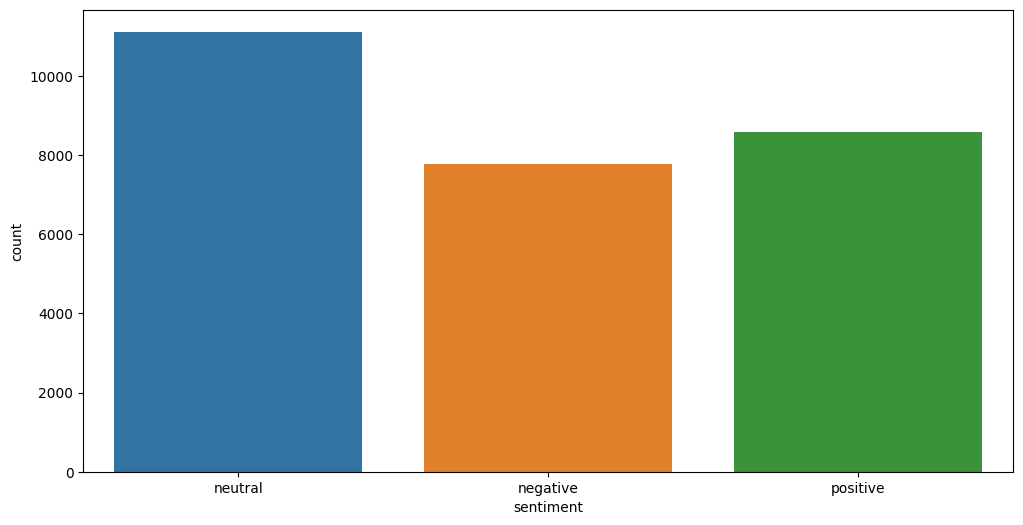

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

### Cleaning the Corpus
Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data

In [42]:
train.head(10)

,textID,text,selected_text,sentiment,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,"[id, have, responded, if, i, were, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,"[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me,bullying me,negative,"[my, boss, is, bullying, me]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,"[sons, of, why, couldnt, they, put, them, on, ..."
5,28b57f3990,some shameless plugging for the best rangers...,some shameless plugging for the best rangers...,neutral,"[some, shameless, plugging, for, the, best, ra..."
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive,"[feedings, for, the, baby, are, fun, when, he,..."
7,50e14c0bb8,soooo high,soooo high,neutral,"[soooo, high]"
8,e050245fbd,both of you,both of you,neutral,"[both, of, you]"
9,fc2cbefa9d,journey wow u just became cooler hehe is tha...,wow u just became cooler,positive,"[journey, wow, u, just, became, cooler, hehe, ..."


In [27]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [28]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['selected_text'].apply(lambda x:clean_text(x))

In [31]:
train.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative
2,088c60f138,my boss is bullying me,bullying me,negative
3,9642c003ef,what interview leave me alone,leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative
5,28b57f3990,some shameless plugging for the best rangers...,some shameless plugging for the best rangers...,neutral
6,6e0c6d75b1,feedings for the baby are fun when he is all ...,fun,positive
7,50e14c0bb8,soooo high,soooo high,neutral
8,e050245fbd,both of you,both of you,neutral
9,fc2cbefa9d,journey wow u just became cooler hehe is tha...,wow u just became cooler,positive


## Most Common words in our Text

In [32]:
train['temp_list'] = train['text'].apply(lambda x:str(x).split())

In [36]:
train.head()

,textID,text,selected_text,sentiment,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,"[id, have, responded, if, i, were, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,"[sooo, sad, i, will, miss, you, here, in, san,..."
2,088c60f138,my boss is bullying me,bullying me,negative,"[my, boss, is, bullying, me]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,"[what, interview, leave, me, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,"[sons, of, why, couldnt, they, put, them, on, ..."


In [33]:
res = {}
for words in train['temp_list']:
    for word in words:
        if word not in res:
            res[word] = 1
        else:
            res[word] += 1

In [34]:
res

{'id': 161,
 'have': 2594,
 'responded': 1,
 'if': 773,
 'i': 13169,
 'were': 454,
 'going': 1096,
 'sooo': 108,
 'sad': 474,
 'will': 895,
 'miss': 614,
 'you': 4807,
 'here': 626,
 'in': 3783,
 'san': 19,
 'diego': 11,
 'my': 5510,
 'boss': 22,
 'is': 3973,
 'bullying': 1,
 'me': 2810,
 'what': 914,
 'interview': 27,
 'leave': 139,
 'alone': 84,
 'sons': 8,
 'of': 3144,
 'why': 487,
 'couldnt': 119,
 'they': 656,
 'put': 152,
 'them': 425,
 'on': 2850,
 'the': 8980,
 'releases': 2,
 'we': 833,
 'already': 243,
 'bought': 72,
 'some': 783,
 'shameless': 1,
 'plugging': 3,
 'for': 3650,
 'best': 306,
 'rangers': 3,
 'forum': 7,
 'earth': 22,
 'feedings': 1,
 'baby': 159,
 'are': 1365,
 'fun': 527,
 'when': 675,
 'he': 486,
 'all': 1612,
 'smiles': 11,
 'and': 5067,
 'coos': 1,
 'soooo': 70,
 'high': 72,
 'both': 113,
 'journey': 11,
 'wow': 190,
 'u': 923,
 'just': 2245,
 'became': 10,
 'cooler': 6,
 'hehe': 75,
 'that': 2568,
 'possible': 22,
 'as': 695,
 'much': 659,
 'love': 1122,
 

In [43]:
df_common_word = pd.DataFrame(res.items(), columns=['word', 'count']).sort_values(by='count',ascending=False).reset_index(drop=True).iloc[:20]

In [44]:
df_common_word.style.background_gradient(cmap='Blues')

,word,count
0,i,13169
1,to,10012
2,the,8980
3,a,6710
4,my,5510
5,and,5067
6,you,4807
7,it,4059
8,is,3973
9,in,3783


In [39]:
fig = px.bar(df_common_word, x="count", y="word", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='word')
fig.show()

Without Stop Words

In [45]:
train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [47]:
train.head()

,textID,text,selected_text,sentiment,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,"[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,"[sons, couldnt, put, releases, already, bought]"


In [48]:
res = {}
for words in train['temp_list']:
    for word in words:
        if word not in res:
            res[word] = 1
        else:
            res[word] += 1

df_common_word = pd.DataFrame(res.items(), columns=['word', 'count']).sort_values(by='count',ascending=False).reset_index(drop=True).iloc[:20]
df_common_word.style.background_gradient(cmap='Blues')

,word,count
0,day,2044
1,good,1549
2,get,1426
3,like,1346
4,go,1267
5,dont,1200
6,love,1122
7,work,1112
8,today,1096
9,going,1096


In [49]:
fig = px.treemap(df_common_word, path=['word'], values='count',title='Tree of Most Common Words')
fig.show()

# Most common words Sentiments Wise from Text

Let's look at the most common words in different sentiments

In [50]:
train.head()

,textID,text,selected_text,sentiment,temp_list
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,"[id, responded, going]"
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,"[sons, couldnt, put, releases, already, bought]"


In [51]:
positive_sent = train[train['sentiment']=='positive']
negative_sent = train[train['sentiment']=='negative']
neutral_sent = train[train['sentiment']=='neutral']

In [52]:
res = {}
for words in positive_sent['temp_list']:
    for word in words:
        if word not in res:
            res[word] = 1
        else:
            res[word] += 1

df_common_word_pos = pd.DataFrame(res.items(), columns=['word', 'count']).sort_values(by='count',ascending=False).reset_index(drop=True).iloc[:20]
df_common_word_pos.style.background_gradient(cmap='Blues')

,word,count
0,day,1223
1,good,1046
2,love,875
3,happy,840
4,mothers,627
5,thanks,553
6,great,478
7,like,413
8,hope,396
9,get,367


In [53]:
fig = px.bar(df_common_word_pos, x="count", y="word", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [54]:
res = {}
for words in negative_sent['temp_list']:
    for word in words:
        if word not in res:
            res[word] = 1
        else:
            res[word] += 1

df_common_word_neg = pd.DataFrame(res.items(), columns=['word', 'count']).sort_values(by='count',ascending=False).reset_index(drop=True).iloc[:20]
df_common_word_neg.style.background_gradient(cmap='Reds')

,word,count
0,like,476
1,dont,469
2,cant,463
3,get,436
4,miss,422
5,go,401
6,sad,389
7,work,386
8,sorry,340
9,really,339


In [55]:
fig = px.treemap(df_common_word_neg, path=['word'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [56]:
res = {}
for words in neutral_sent['temp_list']:
    for word in words:
        if word not in res:
            res[word] = 1
        else:
            res[word] += 1

df_common_word_neu = pd.DataFrame(res.items(), columns=['word', 'count']).sort_values(by='count',ascending=False).reset_index(drop=True).iloc[:20]
df_common_word_neu.style.background_gradient(cmap='Greens')

,word,count
0,get,623
1,go,576
2,day,503
3,dont,491
4,going,479
5,work,477
6,like,457
7,lol,454
8,got,453
9,today,435


In [57]:
fig = px.bar(df_common_word_neu, x="count", y="word", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='word')
fig.show()

In [58]:
fig = px.treemap(df_common_word_neu, path=['word'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

* We can see words like get,go,dont,got,u,cant,lol,like are common in all three segments . That's interesting because words like dont and cant are more of negative nature and words like lol are more of positive nature.Does this mean our data is incorrectly labelled , we will have more insights on this after N-gram analysis
* It will be interesting to see the word unique to different sentiments

## Check Bigrams

In [143]:
# if got time, check bigrams :)

In [142]:
from nltk import word_tokenize 
from nltk.util import ngrams

def generate_list_bigrams(text):
    res = []
    token = word_tokenize(text)
    bigram = list(ngrams(token, 2))
    for item in bigram:
        res.append(' '.join(item))
    return res

generate_list_bigrams('id have responded if i were going')

['id have', 'have responded', 'responded if', 'if i', 'i were', 'were going']

## It's Time For WordClouds

We will be building wordclouds in the following order:

* WordCloud of Neutral Tweets
* WordCloud of Positive Tweets
* WordCloud of Negative Tweets


In [59]:
temp_res = []
for words in negative_sent['temp_list']:
    temp_words = ' '.join(words)
    temp_res.append(temp_words)  

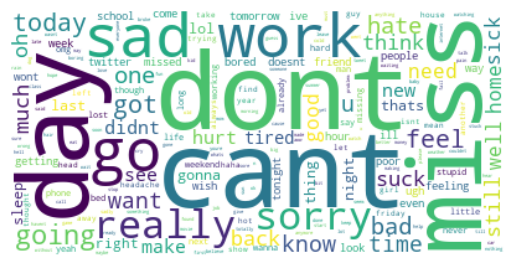

In [60]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(' '.join(temp_res))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Modeling

In [61]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

In [63]:
train.head()

,textID,text,selected_text,sentiment,temp_list,filtered_text
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,"[id, responded, going]",id responded going
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,"[sooo, sad, miss, san, diego]",sooo sad miss san diego
2,088c60f138,my boss is bullying me,bullying me,negative,"[boss, bullying]",boss bullying
3,9642c003ef,what interview leave me alone,leave me alone,negative,"[interview, leave, alone]",interview leave alone
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,"[sons, couldnt, put, releases, already, bought]",sons couldnt put releases already bought


In [62]:
train['filtered_text'] = train['temp_list'].apply(lambda x: ' '.join(x))

In [64]:
def to_category_id(x):
    if x == 'positive':
        return 2
    elif x == 'negative':
        return 0
    else:
        return 1

train['category_id'] = train['sentiment'].apply(lambda x : to_category_id(x))

In [66]:
train.head()

,textID,text,selected_text,sentiment,temp_list,filtered_text,category_id
0,cb774db0d1,id have responded if i were going,id have responded if i were going,neutral,"[id, responded, going]",id responded going,1
1,549e992a42,sooo sad i will miss you here in san diego,sooo sad,negative,"[sooo, sad, miss, san, diego]",sooo sad miss san diego,0
2,088c60f138,my boss is bullying me,bullying me,negative,"[boss, bullying]",boss bullying,0
3,9642c003ef,what interview leave me alone,leave me alone,negative,"[interview, leave, alone]",interview leave alone,0
4,358bd9e861,sons of why couldnt they put them on the rel...,sons of,negative,"[sons, couldnt, put, releases, already, bought]",sons couldnt put releases already bought,0


In [67]:
df_train = train[['filtered_text','category_id','sentiment']]

In [68]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df_train.filtered_text).toarray()

labels = df_train.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 27480 complaints is represented by 5316 features (TF-IDF score of unigrams and bigrams)


In [69]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

d:\Program\miniconda3\envs\rakamin_sentiment\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:\Program\miniconda3\envs\rakamin_sentiment\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

d:

In [202]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LogisticRegression,0.685917,0.007607
MultinomialNB,0.643559,0.005718
RandomForestClassifier,0.432496,0.001764


In [203]:
X = df_train['filtered_text'] # Collection of documents
y = df_train['sentiment'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

d:\Program\miniconda3\envs\rakamin_sentiment\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [209]:
path_saved_model = os.path.join(os.getcwd(),SAVED_MODEL_PATH)
if not os.path.exists(path_saved_model):
    os.makedirs(path_saved_model)

In [210]:
import pickle

pickle.dump(fitted_vectorizer, open(os.path.join(path_saved_model,'sa_tfidf_vectorizer.pkl'), "wb"))
pickle.dump(model, open(os.path.join(path_saved_model,'sa_model.pkl'), "wb"))

In [218]:
loaded_vectorizer = pickle.load(open(os.path.join(path_saved_model,'sa_tfidf_vectorizer.pkl'),'rb'))
loaded_model = pickle.load(open(os.path.join(path_saved_model,'sa_model.pkl'),'rb'))

In [219]:
new_complaint = """i hate you"""

In [220]:
x = fitted_vectorizer.transform([new_complaint])
model.predict_proba(x)

array([[9.87841960e-01, 1.14145923e-02, 7.43447644e-04]])

In [226]:
model.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [221]:
x = loaded_vectorizer.transform([new_complaint])
loaded_model.predict_proba(x)

array([[9.87841960e-01, 1.14145923e-02, 7.43447644e-04]])

In [223]:
X_train.iloc[0]

'lost worknt happy right sloanster'

In [224]:
y_train.iloc[0]

'negative'

In [235]:
y_pred = model.predict(fitted_vectorizer.transform(X_test))
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1917
     neutral       0.62      0.75      0.68      2801
    positive       0.76      0.69      0.72      2152

    accuracy                           0.68      6870
   macro avg       0.70      0.67      0.68      6870
weighted avg       0.69      0.68      0.68      6870

